# Criando Problemas, de acordo com a questão 5 da Lista de Exercícios. Um classico problemas envolvendo tempo de transito e vagarosidades. (Raio sísimico)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o erro residual
def residual_error(D, p, t):
    return np.linalg.norm(np.dot(D, p) - t)**2

# Gerando dados fictícios para D e t (os reais podem ser substituídos)
D = np.array([
    [1, 0, 0, 1, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 1]
])
t = np.array([2, 3])

# Solução de mínimos quadrados
DtD = np.dot(D.T, D)
Dtt = np.dot(D.T, t)
try:
    p_minimos_quadrados = np.linalg.solve(DtD, Dtt)
    # Intervalo de valores para variação dos parâmetros p
    p1_range = np.linspace(-2, 2, 100)
    p2_range = np.linspace(-2, 2, 100)

    # Inicializando a matriz de erro
    error_matrix = np.zeros((len(p1_range), len(p2_range)))

    # Calculando o erro para cada combinação de p1 e p2
    for i, p1 in enumerate(p1_range):
        for j, p2 in enumerate(p2_range):
            # Criando vetor de parâmetros p variando p1 e p2
            p = np.array([p1, 0, p2, p1, p1, p2, 0, p1, p2])
            error_matrix[i, j] = residual_error(D, p, t)

    # Gerando o gráfico de contorno
    plt.contourf(p1_range, p2_range, error_matrix, levels=50, cmap='viridis')
    plt.colorbar(label='Erro residual')

    # Encontrando o ponto onde o erro é mínimo
    min_idx = np.unravel_index(np.argmin(error_matrix), error_matrix.shape)
    min_p1 = p1_range[min_idx[0]]
    min_p2 = p2_range[min_idx[1]]

    # Plotando o ponto mínimo no gráfico (solução de mínimos quadrados)
    plt.plot(p_minimos_quadrados[0], p_minimos_quadrados[2], 'ro', label='Solução de Mínimos Quadrados')
    plt.xlabel('p1')
    plt.ylabel('p2')
    plt.title('Curvas de Contorno e Solução de Mínimos Quadrados')
    plt.legend()
    plt.show()
except ValueError as err:
    print('ValueError: ',err)




ValueError:  Singular matrix


## A matrix do problema anterior é uma matriz do tipo singular. Outra forma de resolver esse problema quando isso ocorre é Regularização de Tikhono

## $$p^{*} =(D^TD+λI)^{−1}\cdot D^T t$$

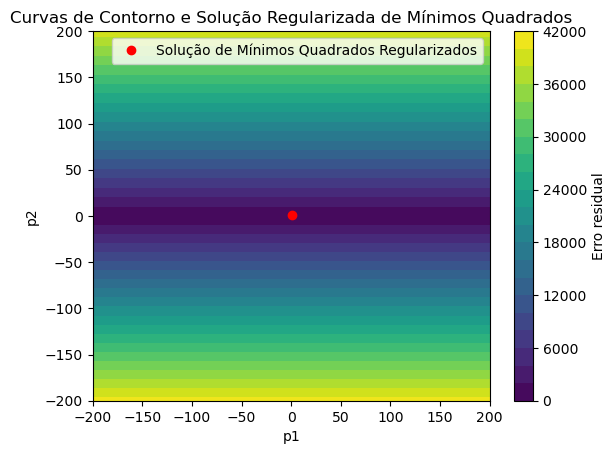

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o erro residual
def residual_error(D, p, t):
    return np.linalg.norm(np.dot(D, p) - t)**2

# Gerando dados fictícios para D e t (os reais podem ser substituídos)
D = np.array([
    [1, 0, 0, 1, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 1]
])
t = np.array([2, 3])

# Parâmetro de regularização
lambda_reg = 0.2

# Matriz identidade para a regularização
I = np.eye(D.shape[1])

# Solução de mínimos quadrados regularizados
DtD = np.dot(D.T, D)
Dtt = np.dot(D.T, t)
p_minimos_quadrados = np.linalg.solve(DtD + lambda_reg * I, Dtt)

# Intervalo de valores para variação dos parâmetros p
p1_range = np.linspace(-200, 200, 3)
p2_range = np.linspace(-200, 200, 3)

# Inicializando a matriz de erro
error_matrix = np.zeros((len(p1_range), len(p2_range)))

# Calculando o erro para cada combinação de p1 e p2
for i, p1 in enumerate(p1_range):
    for j, p2 in enumerate(p2_range):
        # Criando vetor de parâmetros p variando p1 e p2
        p = np.array([p1, p2, 0, 0, 0, 0, 0, 0, 0])
        error_matrix[i, j] = residual_error(D, p, t)

# Gerando o gráfico de contorno
plt.contourf(p1_range, p2_range, error_matrix, levels=20, cmap='viridis')
plt.colorbar(label='Erro residual')

# Plotando o ponto mínimo no gráfico (solução de mínimos quadrados)
plt.plot(p_minimos_quadrados[0], p_minimos_quadrados[2], 'ro', label='Solução de Mínimos Quadrados Regularizados')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Curvas de Contorno e Solução Regularizada de Mínimos Quadrados')
plt.legend()
plt.show()


In [3]:
p_minimos_quadrados[0]

0.47619047619047616

In [4]:
p_minimos_quadrados[2]

0.9375